# Εργαστηριακή Άσκηση 8 - Πρακτικό Μέρος
## Εργαστήριο Βιοϊατρικής Τεχνολογίας

Ονοματεπώνυμο: Δανάη Σπέντζου

Αριθμός μητρώου: 03120237

### Εισαγωγή

Ας θεωρήσουμε πως βρίσκεστε στο στάδιο προ-επεξεργασίας εικόνων που απεικονίζουν δερματικές παθήσεις.

Γνωρίζετε πως όλες οι εικόνες περιέχουν κάποια πάθηση, αορίστου όμως σχήματος. Θέλετε με κάποιο τρόπο να πραγματοποιήσετε κατάτμηση της εικόνας, εντοπίζοντας ακριβώς τα όρια της παθολογίας.

Με αυτό τον τρόπο, σε μεταγενέστερο στάδιο, θα μπορείτε να εξάγετε στατιστικά και μορφολογικά χαρακτηριστικά, τα οποία μπορούν να χρησιμοποιηθούν για τη διάγνωση νέων εικόνων.

Τρέξτε το παρακάτω κομμάτι κώδικα για να φορτώσετε τα δεδομένα σας. Εάν για οποιοδήποτε λόγο οι εντολές δεν λειτουργούν, κατεβάστε και φορτώστε μόνοι σας τα δεδομένα ακολουθώντας το link.

In [2]:
!wget "https://biomedntuagr.sharepoint.com/:u:/g/EdOeLXkbBERDinDxqffqQEgBulhhCf5Ro5LfJLc7XuOp5A?download=1" -O lesions.zip
!unzip -q lesions.zip
!rm lesions.zip

--2023-04-05 11:24:36--  https://biomedntuagr.sharepoint.com/:u:/g/EdOeLXkbBERDinDxqffqQEgBulhhCf5Ro5LfJLc7XuOp5A?download=1
Resolving biomedntuagr.sharepoint.com (biomedntuagr.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to biomedntuagr.sharepoint.com (biomedntuagr.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /Shared%20Documents/Education%20ECE/Lab%20(Summer%20Semester)/Exercise%208/2020-2021/Data/lesions.zip?ga=1 [following]
--2023-04-05 11:24:37--  https://biomedntuagr.sharepoint.com/Shared%20Documents/Education%20ECE/Lab%20(Summer%20Semester)/Exercise%208/2020-2021/Data/lesions.zip?ga=1
Reusing existing connection to biomedntuagr.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 13684530 (13M) [application/x-zip-compressed]
Saving to: ‘lesions.zip’

lesions.zip         100%[===================>]  13.05M  10.3MB/s    in 1.3s    

2023-04-05 11:24:39 (10.3 MB/s) -

Ο κώδικας που δίνεται παρακάτω περιέχει κενά. Σε κάθε κενό, υπάρχει και ένα σχόλιο που περιγράφει το επιθυμητό αποτέλεσμα της εντολής.

Συμπληρώστε τα κενά ώστε να ολοκληρώσετε τον αλγόριθμο επεξεργασίας της εικόνας. Για βοήθεια μπορείτε να ανατρέξετε στην άσκηση που έγινε κατά τη διάρκεια του εργαστηρίου, η οποία βρίσκεται στον εργαστηριακό οδηγό και το mycourses.

**Προσοχή**: Σε ορισμένα σημεία (με bold)  ζητείται να σχολιάσετε σύντομα και με λόγια.

Τελικό παραδοτέο: το αρχείο σας .ipynb με εκτελεσμένο τον κώδικα. Παράδοση στο helios.

Ας φορτώσουμε τα δεδομένα που κατεβάσαμε προηγουμένως.

In [41]:
from skimage.io import imread
import matplotlib.pyplot as plt
from glob import glob
from pathlib import Path
import numpy as np


img_filepaths = list(Path("./lesions").glob("*.jpg"))

print(img_filepaths)

[PosixPath('lesions/1164.jpg'), PosixPath('lesions/161.jpg'), PosixPath('lesions/658.jpg'), PosixPath('lesions/744.jpg'), PosixPath('lesions/573.jpg'), PosixPath('lesions/322.jpg'), PosixPath('lesions/953.jpg'), PosixPath('lesions/402.jpg'), PosixPath('lesions/1218.jpg'), PosixPath('lesions/1499.jpg'), PosixPath('lesions/389.jpg'), PosixPath('lesions/436.jpg'), PosixPath('lesions/1333.jpg'), PosixPath('lesions/3.jpg'), PosixPath('lesions/1228.jpg'), PosixPath('lesions/868.jpg'), PosixPath('lesions/1364.jpg'), PosixPath('lesions/87.jpg'), PosixPath('lesions/1216.jpg'), PosixPath('lesions/238.jpg'), PosixPath('lesions/536.jpg'), PosixPath('lesions/881.jpg'), PosixPath('lesions/1229.jpg'), PosixPath('lesions/994.jpg'), PosixPath('lesions/1215.jpg'), PosixPath('lesions/1297.jpg'), PosixPath('lesions/1038.jpg'), PosixPath('lesions/407.jpg'), PosixPath('lesions/628.jpg'), PosixPath('lesions/507.jpg'), PosixPath('lesions/1160.jpg'), PosixPath('lesions/1141.jpg'), PosixPath('lesions/940.jpg'),

Για να πάρουμε μια ιδέα των δεδομένων, εμφανίζουμε 5 τυχαίες εικόνες από αυτά.

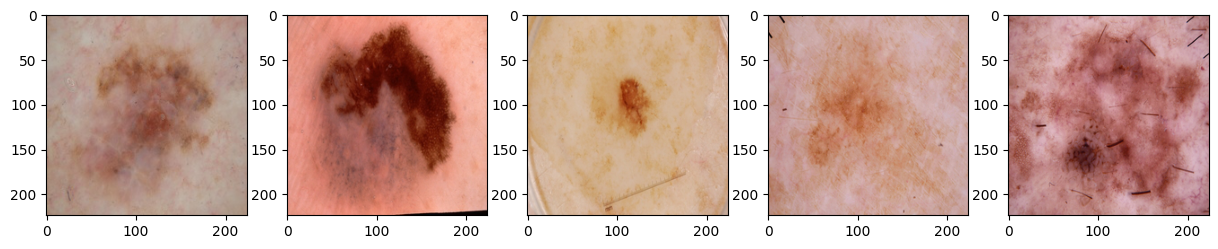

In [81]:
import random

plt.figure(figsize = (15, 8))
for i in range(5):
  random_img_filepath = random.choice(img_filepaths)
  random_img = imread(random_img_filepath)
  plt.subplot(1, 5, i+1)
  plt.imshow(random_img)
plt.show()

Τώρα επιλέγουμε μια τυχαία εικόνα. Την εμφανίζουμε, μαζί με τα 3 κανάλια της (RGB). Θέλουμε να δούμε ποιό κανάλι είναι πιο βολικό ώστε να δουλέψουμε με αυτό.

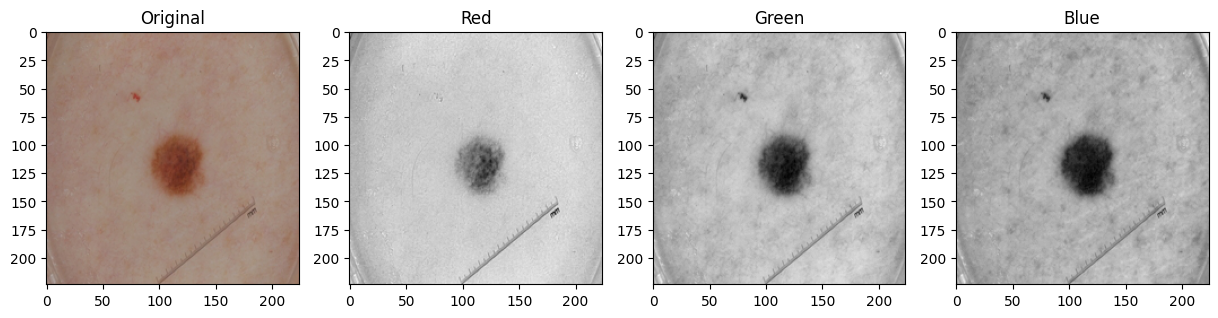

In [82]:
plt.figure(figsize = (15, 8))

random_img2 = imread(random.choice(img_filepaths))

plt.subplot(1, 4, 1)
plt.title('Original')
plt.imshow(random_img2, cmap='gray')

plt.subplot(1, 4, 2)
plt.title('Red')
plt.imshow(random_img2[:,:,0], cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Green')
plt.imshow(random_img2[:,:,1], cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Blue')
plt.imshow(random_img2[:,:,2], cmap='gray')

plt.show()

**Ποιό από όλα τα κανάλια φαίνεται καταλληλότερο για την ανίχνευση των ορίων της παθολογίας; Εξηγήστε σύντομα.**

Μελετώντας τις παραπάνω νέες εικόνες, διαπιστώνουμε πως η συνιστώσα η οποία παρέχει την πιο χρήσιμη πληροφορία για την ανίχνευση ορίων της παθολογίας είναι η συνιστώσα B του χώρου RGB. Η διαπίστωση αυτή προήλθε αναλύοντας τη φωτεινότητα που παρουσιάζει το μελάνωμα στις παραπάνω εικόνες. Κατά την ανάλυση των εικόνων αυτών προέκυψε πως το μελάνωμα παρουσιάζει αρκετά χαμηλότερη φωτεινότητα σε σχέση με την υγιή επίφανεια του δέρματος στην εικόνα B. Πρακτικά αυτό σημαίνει πως το μελάνωμα περιέχει λιγότερο μπλε χρώμα (κάτι το οποίο το γνωρίζαμε εκ των προτέρων). Παρατηρώντας την αρχική εικόνα και την εικόνα Β διαπιστώνουμε πως στην τελευταία διακρίνεται καλύτερα η περιοχή ενδιαφέροντος. Το γεγονός αυτό μας οδηγεί στην περαιτέρω επεξεργασία της εικόνας Β προκειμένου να οδηγηθούμε σε μια εικόνα στην οποία το μελάνωμα θα απεικονίζεται ευκρινέστερα.




Στο κανάλι που θεωρείτε καταλληλότερο, εφαρμόστε ένα K-Means clustering. Η μέθοδος αυτή κατηγοριοποιεί κάθε pixel της εικόνας σας σε μία από K ομάδες. 

Θέλετε να χωρίσετε τα pixels σε παθολογικά και μη-παθολογικά. Επομένως χρειάζεστε 2 ομάδες. 

---

***Hint***: Στο documentation του KMeans clustering (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) θα βρείτε ένα παράδειγμα για να χρησιμοποιήσετε. 

Βλέπουμε πως η μέθοδος fit περιμένει ως είσοδο έναν πίνακα $Χ$ με διαστάσεις (n_samples, n_features). 

- Εδώ, samples είναι όλα τα pixels της εικόνας τα οποία είναι σε πλήθος: ``img_height * img_width``. 
- Feature είναι απλά η ένταση της φωτεινότητας, άρα ένα μόνο στοιχείο. 

Άρα, ως είσοδος στη συνάρτηση fit θα δοθεί η εικόνα μετασχηματισμένη σε διαστάσεις (``img_height * img_width, 1``). Μπορείτε λοιπόν να χρησιμοποιήσετε ως είσοδο:

``random_img_bw.reshape((height*width,1))``

είτε πιο απλά

``random_img_bw.reshape((-1, 1))``

Το τελικό αποτέλεσμα θα πρέπει να μετασχηματιστεί πάλι πίσω στις διαστάσεις της αρχικής εικόνας (βλ. το ακριβώς επόμενο κομμάτι κώδικα με τα kmeans.labels_).



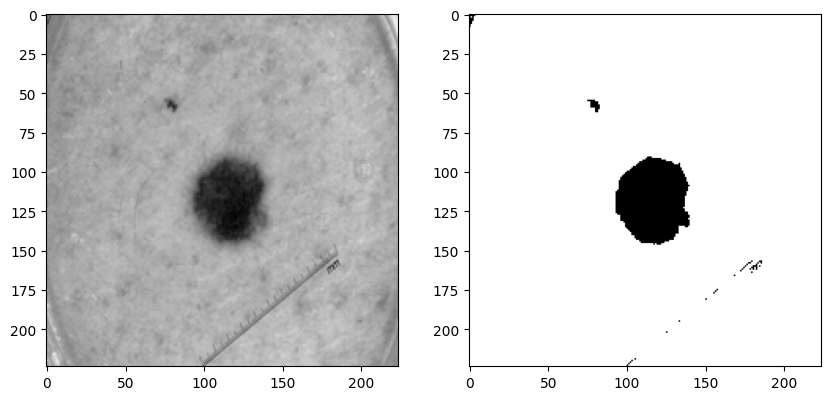

In [83]:
from sklearn.cluster import KMeans
from skimage.color import rgb2gray
import cv2

# Αποθήκευσε σε αυτή τη μεταβλητή το επιλεγμένο (καταλληλότερο) κανάλι
random_img_bw = random_img2[:,:,2]

# Εφαρμογή KMeans Clustering για τη διάκριση των πίξελς μεταξύ Κ ομάδων.
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(random_img_bw.reshape(-1,1))
kmeans.labels_
kmeans_labels = kmeans.labels_.reshape(random_img_bw.shape[0], random_img_bw.shape[1])

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
# Εμφάνισε ξανά την αρχική εικόνα
plt.imshow(random_img_bw, cmap='gray')

plt.subplot(1,2,2)
# Εμφάνιση της εικόνας έπειτα από kmeans clustering. 
# Εφόσον έχετε πραγματοποιήσει kmeans, η νέα εικόνα θα είναι τα labels (kmeans.labels_)
# Θα έχετε δηλαδή μια δυαδική εικόνα.
plt.imshow(kmeans_labels, cmap='binary')

plt.show()

Θέλουμε να πραγματοποιήσουμε μια ομαλοποίηση της εικόνας, και απόρριψη των πολύ μικρών, μεμονομένων περιοχών. Για αυτό το λόγο κάνουμε ένα μορφολογικό άνοιγμα και κλείσιμο της εικόνας.

In [84]:
from skimage.morphology import disk, binary_opening, binary_closing

filtered_img = binary_opening(kmeans_labels.reshape(random_img_bw.shape), selem = disk(3))
filtered_img = binary_closing(filtered_img, selem = disk(3))

# Εμφάνιση της εικόνας filtered_img
plt.show()

<ipython-input-84-0a0eed79505b>:3: FutureWarning: `selem` is a deprecated argument name for `binary_opening`. It will be removed in version 1.0. Please use `footprint` instead.
  filtered_img = binary_opening(kmeans_labels.reshape(random_img_bw.shape), selem = disk(3))
<ipython-input-84-0a0eed79505b>:4: FutureWarning: `selem` is a deprecated argument name for `binary_closing`. It will be removed in version 1.0. Please use `footprint` instead.
  filtered_img = binary_closing(filtered_img, selem = disk(3))


Τα pixels της εικόνας έχουν χωριστεί σε 2 ομάδες. Όμως ποια ομάδα είναι η παθολογική, και ποιά η φυσιολογική;

Με την εντολή kmeans.cluster_centers_ μπορούμε να βρούμε το κέντρο της κάθε ομάδας (ή αλλιώς μια τιμή αντιπροσωπευτική της φωτεινότητας της κάθε ομάδας).

**Πώς μπορείτε να βρείτε ποιά ομάδα είναι η παθολογική βάσει του κέντρου της; Εξηγείστε σύντομα.**

Χρησιμοποιώντας τη μέθοδο kmeans.cluster_centers_ μπορούμε να βρούμε τα κέντρα των ομάδων στις οποίες χωρίστηκαν τα pixels της εικόνας. Αν τα κέντρα είναι κοντά στην ακραία τιμή των pixel values, τότε η αντίστοιχη ομάδα θεωρείται πιθανότερα η παθολογική. Για παράδειγμα, αν ένα από τα κέντρα είναι πολύ κοντά στο μέγιστο pixel value της εικόνας, τότε η αντίστοιχη ομάδα θα θεωρείται πιθανότερα η παθολογική ομάδα, ενώ η άλλη ομάδα θα θεωρείται η φυσιολογική ομάδα. 

Η εντολή argmin και argmax μας δίνει τη θέση της ελάχιστης και μέγιστης τιμής σε έναν πίνακα. Στη μεταβλητή label αποθηκεύστε τη θέση της παθολογικής ομάδας.

In [85]:
print(kmeans.cluster_centers_)

print(kmeans.cluster_centers_.argmin())
print(kmeans.cluster_centers_.argmax())

label = np.argmin(kmeans.cluster_centers_)

[[120.38961228]
 [ 53.88428571]]
1
0


Δημιουργούμε μια μάσκα στην οποία όλα τα pixels έχουν την τιμή 0, εκτός αυτών που ανήκουν εντός της ομάδας που επιλέξατε παραπάνω, τα οποία θα έχουν την τιμή 1.

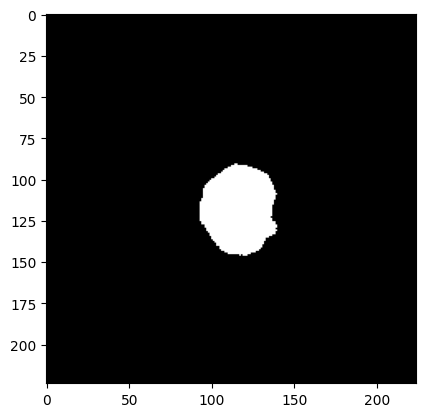

In [86]:
mask = np.zeros_like(random_img_bw)
mask[filtered_img == label] = 1

plt.imshow(mask, cmap='gray')
plt.show()

Δημιουργούμε το περίγραμμα της μάσκας, χρησιμοποιώντας ανίχνευση ακμών με Sobel.

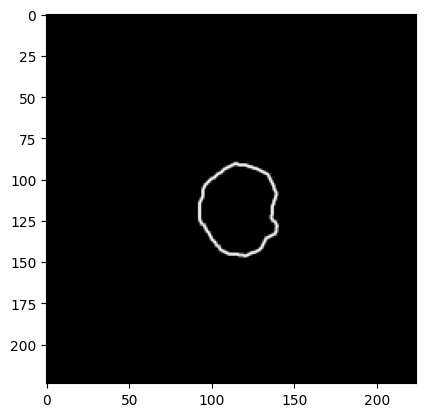

In [87]:
from skimage import filters

mask2 = filters.sobel(mask)

plt.imshow(mask2, cmap='gray')
plt.show()

Τελικά, εμφανίζουμε το τελικό μας αποτέλεσμα.

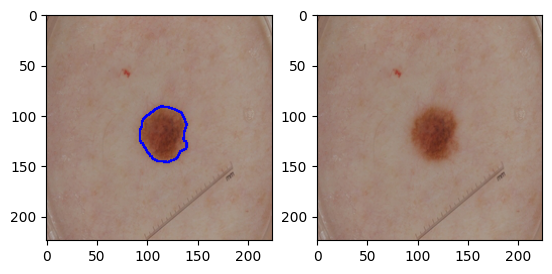

In [88]:
final_img = np.copy(random_img2)
# Κάνε μπλε τα σημεία της εικόνας final_img, στα οποία τα pixels της μάσκας mask2 είναι λευκά.
final_img[mask2>0] = [0, 0, 255]

plt.subplot(1,2,1)
# Εμφάνιση της final_img
plt.imshow(final_img)

plt.subplot(1,2,2)
# Εμφάνιση της αρχικής εικόνας random_img2
plt.imshow(random_img2)

plt.show()

Χρησιμοποιώντας τη μάσκα και την αρχική εικόνα, εμφανίστε μόνο την έγχρωμη παθολογική περιοχή, μαυρίζοντας τα pixels του δέρματος.

Για την παθολογική περιοχή μόνο (δηλαδή χωρίς να λαμβάνετε υπόψιν το δέρμα ή τα pixels που μόλις μαυρίσατε), υπολογίστε στατιστικά χαρακτηριστικά όπως στην εργαστηριακή άσκηση που είδατε στο μάθημα (μέση τιμή, τυπική απόκλιση, λοξότητα, κύρτωση). Υπόδειξη: ενώ υπάρχουν πολλοί τρόποι να γίνει αυτό, ο τρόπος με τον οποίο επιλέξατε τα pixels που χρωματίσατε μπλε μέσω της μάσκας mask2, ίσως βοηθήσει.

Average gray level: 85.84598625775097
Standard deviation: 36.627122195676236
Skewness: [-0.29777479  0.25270071  0.63111969]
Kurtosis: [-0.782239   -1.00823861 -0.55779473]


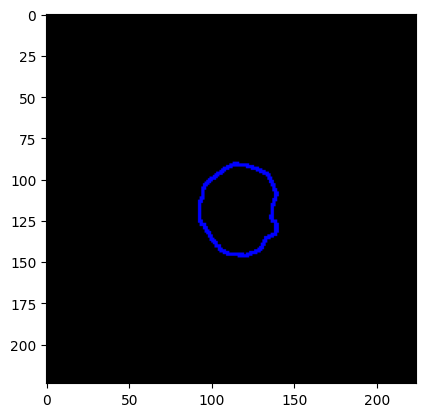

In [89]:
from scipy.stats import skew, entropy, kurtosis

skin_mask = np.logical_not(mask2.astype(bool))
final_img[skin_mask] = 0

# Υπολογισμός μέσης τιμής, τυπικής απόκλισης, λοξότητας και κύρτωσης
avg = np.mean(random_img2[filtered_img == label])
std = np.std(random_img2[filtered_img == label])
skn = skew(random_img2[filtered_img == label])
krt = kurtosis(random_img2[filtered_img == label])

print('Average gray level: {}\nStandard deviation: {}\nSkewness: {}\nKurtosis: {}'.format(avg, std, skn, krt))

plt.imshow(final_img)
plt.show()